In [1]:
%run jupyterQ.ipynb
%run init.ipynb
%run states.ipynb
%run ptr.ipynb
#%run qnesses.ipynb

# Magnetic dipolar interaction
## Hamiltonian e unitary evolution operator
\begin{equation}
H = 2^{-1}D(\sigma_{1}\otimes\sigma_{1}+\sigma_{2}\otimes\sigma_{2}-2\sigma_{3}\otimes\sigma_{3}) = 0|\Psi_{-}\rangle\langle\Psi_{-}| + 2D|\Psi_{+}\rangle\langle\Psi_{+}| -D(|\Phi_{-}\rangle\langle\Phi_{-}|+|\Phi_{+}\rangle\langle\Phi_{+}|).
\end{equation}

Evolution operator
\begin{equation}
U_{dd} = e^{-iHt} = |\Psi_{-}\rangle\langle\Psi_{-}| + e^{-i2Dt}|\Psi_{+}\rangle\langle\Psi_{+}| + e^{iDt}(|\Phi_{-}\rangle\langle\Phi_{-}|+|\Phi_{+}\rangle\langle\Phi_{+}|).
\end{equation}

In [2]:
bell(0,0), bell(0,1), bell(1,0), bell(1,1) # phi+, psi+, psi-, phi-

⎛⎡√2⎤  ⎡0 ⎤  ⎡ 0  ⎤  ⎡ √2 ⎤⎞
⎜⎢──⎥  ⎢  ⎥  ⎢    ⎥  ⎢ ── ⎥⎟
⎜⎢2 ⎥  ⎢√2⎥  ⎢ √2 ⎥  ⎢ 2  ⎥⎟
⎜⎢  ⎥  ⎢──⎥  ⎢ ── ⎥  ⎢    ⎥⎟
⎜⎢0 ⎥  ⎢2 ⎥  ⎢ 2  ⎥  ⎢ 0  ⎥⎟
⎜⎢  ⎥, ⎢  ⎥, ⎢    ⎥, ⎢    ⎥⎟
⎜⎢0 ⎥  ⎢√2⎥  ⎢-√2 ⎥  ⎢ 0  ⎥⎟
⎜⎢  ⎥  ⎢──⎥  ⎢────⎥  ⎢    ⎥⎟
⎜⎢√2⎥  ⎢2 ⎥  ⎢ 2  ⎥  ⎢-√2 ⎥⎟
⎜⎢──⎥  ⎢  ⎥  ⎢    ⎥  ⎢────⎥⎟
⎝⎣2 ⎦  ⎣0 ⎦  ⎣ 0  ⎦  ⎣ 2  ⎦⎠

In [3]:
D, t, r3a, r3b, r1a, r1b, a, b = symbols('D t r_{3a} r_{3b} r_{1a} r_{1b} a b', real = True)

In [4]:
def Hdd(D):
    #return (tp(pauli(1),pauli(1))+tp(pauli(2),pauli(2))-2*tp(pauli(3),pauli(3)))/2
    return 0*proj(bell(1,0)) + 2*D*proj(bell(0,1)) - D*(proj(bell(0,0)) + proj(bell(1,1)))

In [5]:
H=Hdd(D); H, H.eigenvects()

⎛⎡-D  0  0  0 ⎤  ⎡⎛      ⎡⎡0 ⎤⎤⎞  ⎛       ⎡⎡1⎤  ⎡0⎤⎤⎞  ⎛        ⎡⎡0⎤⎤⎞⎤⎞
⎜⎢            ⎥  ⎢⎜      ⎢⎢  ⎥⎥⎟  ⎜       ⎢⎢ ⎥  ⎢ ⎥⎥⎟  ⎜        ⎢⎢ ⎥⎥⎟⎥⎟
⎜⎢0   D  D  0 ⎥  ⎢⎜      ⎢⎢-1⎥⎥⎟  ⎜       ⎢⎢0⎥  ⎢0⎥⎥⎟  ⎜        ⎢⎢1⎥⎥⎟⎥⎟
⎜⎢            ⎥, ⎢⎜0, 1, ⎢⎢  ⎥⎥⎟, ⎜-D, 2, ⎢⎢ ⎥, ⎢ ⎥⎥⎟, ⎜2⋅D, 1, ⎢⎢ ⎥⎥⎟⎥⎟
⎜⎢0   D  D  0 ⎥  ⎢⎜      ⎢⎢1 ⎥⎥⎟  ⎜       ⎢⎢0⎥  ⎢0⎥⎥⎟  ⎜        ⎢⎢1⎥⎥⎟⎥⎟
⎜⎢            ⎥  ⎢⎜      ⎢⎢  ⎥⎥⎟  ⎜       ⎢⎢ ⎥  ⎢ ⎥⎥⎟  ⎜        ⎢⎢ ⎥⎥⎟⎥⎟
⎝⎣0   0  0  -D⎦  ⎣⎝      ⎣⎣0 ⎦⎦⎠  ⎝       ⎣⎣0⎦  ⎣1⎦⎦⎠  ⎝        ⎣⎣0⎦⎦⎠⎦⎠

In [6]:
def Udd(D,t):
    return proj(bell(1,0)) + exp(-1j*2*D*t)*proj(bell(0,1)) + exp(1j*D*t)*(proj(bell(0,0)) + proj(bell(1,1)))

In [7]:
simplify(Udd(D,t))

⎡ 1.0⋅ⅈ⋅D⋅t                                                  ⎤
⎢ℯ                   0                  0              0     ⎥
⎢                                                            ⎥
⎢                  -2.0⋅ⅈ⋅D⋅t          -2.0⋅ⅈ⋅D⋅t            ⎥
⎢             1   ℯ               1   ℯ                      ⎥
⎢    0        ─ + ───────────   - ─ + ───────────      0     ⎥
⎢             2        2          2        2                 ⎥
⎢                                                            ⎥
⎢                   -2.0⋅ⅈ⋅D⋅t        -2.0⋅ⅈ⋅D⋅t             ⎥
⎢              1   ℯ             1   ℯ                       ⎥
⎢    0       - ─ + ───────────   ─ + ───────────       0     ⎥
⎢              2        2        2        2                  ⎥
⎢                                                            ⎥
⎢                                                   1.0⋅ⅈ⋅D⋅t⎥
⎣    0               0                  0          ℯ         ⎦

---
## Initial states
### Pure product states
\begin{equation}
|\psi^{ab}\rangle=|\psi^{a}\rangle\otimes|\psi^{b}\rangle,
\end{equation}
with $|\psi^{s}\rangle:=\cos(\theta_{s}/2)|0\rangle+\sin(\theta_{s}/2)|1\rangle$.

In [8]:
#cb(2,0), cb(2,1)
tha, thb = symbols('theta_a theta_b', Real=True)#; tha, thb
psiA = cos(tha/2)*cb(2,0)+sin(tha/2)*cb(2,1); psiB = cos(thb/2)*cb(2,0)+sin(thb/2)*cb(2,1); psiAB=tp(psiA,psiB)
psiA, psiB, psiAB 

⎛                       ⎡   ⎛θₐ⎞    ⎛θ_b⎞⎤⎞
⎜                       ⎢cos⎜──⎟⋅cos⎜───⎟⎥⎟
⎜                       ⎢   ⎝2 ⎠    ⎝ 2 ⎠⎥⎟
⎜                       ⎢                ⎥⎟
⎜⎡   ⎛θₐ⎞⎤  ⎡   ⎛θ_b⎞⎤  ⎢   ⎛θ_b⎞    ⎛θₐ⎞⎥⎟
⎜⎢cos⎜──⎟⎥  ⎢cos⎜───⎟⎥  ⎢sin⎜───⎟⋅cos⎜──⎟⎥⎟
⎜⎢   ⎝2 ⎠⎥  ⎢   ⎝ 2 ⎠⎥  ⎢   ⎝ 2 ⎠    ⎝2 ⎠⎥⎟
⎜⎢       ⎥, ⎢        ⎥, ⎢                ⎥⎟
⎜⎢   ⎛θₐ⎞⎥  ⎢   ⎛θ_b⎞⎥  ⎢   ⎛θₐ⎞    ⎛θ_b⎞⎥⎟
⎜⎢sin⎜──⎟⎥  ⎢sin⎜───⎟⎥  ⎢sin⎜──⎟⋅cos⎜───⎟⎥⎟
⎜⎣   ⎝2 ⎠⎦  ⎣   ⎝ 2 ⎠⎦  ⎢   ⎝2 ⎠    ⎝ 2 ⎠⎥⎟
⎜                       ⎢                ⎥⎟
⎜                       ⎢   ⎛θₐ⎞    ⎛θ_b⎞⎥⎟
⎜                       ⎢sin⎜──⎟⋅sin⎜───⎟⎥⎟
⎝                       ⎣   ⎝2 ⎠    ⎝ 2 ⎠⎦⎠

### Mixed product states
\begin{equation}
\rho_{j}^{ab} = \rho_{j}^{a}\otimes\rho_{j}^{b},
\end{equation}
with $\rho_{j}^{s} = 2^{-1}(\sigma_{0}+r_{js}\sigma_{j})$.

In [15]:
r3a, r3b, r1a, r1b = symbols('r_{3a} r_{3b} r_{1a} r_{1b}', Real=True)

#### Incoherent class

In [14]:
rhoAB3 = tp(rho1qb(0,0,r3a),rho1qb(0,0,r3b)); simplify(rhoAB3)

⎡0.25⋅(r_{3a} + 1)⋅(r_{3b} + 1)                 0                             
⎢                                                                             
⎢              0                 -0.25⋅(r_{3a} + 1)⋅(r_{3b} - 1)              
⎢                                                                             
⎢              0                                0                 -0.25⋅(r_{3a
⎢                                                                             
⎣              0                                0                             

   0                               0               ⎤
                                                   ⎥
   0                               0               ⎥
                                                   ⎥
} - 1)⋅(r_{3b} + 1)                0               ⎥
                                                   ⎥
   0                 0.25⋅(r_{3a} - 1)⋅(r_{3b} - 1)⎦

#### Coherence class

In [13]:
rhoAB1 = tp(rho1qb(r1a,0,0),rho1qb(r1b,0,0)); simplify(rhoAB1)

⎡       0.25            0.25⋅r_{1b}         0.25⋅r_{1a}      0.25⋅r_{1a}⋅r_{1b
⎢                                                                             
⎢   0.25⋅r_{1b}             0.25         0.25⋅r_{1a}⋅r_{1b}     0.25⋅r_{1a}   
⎢                                                                             
⎢   0.25⋅r_{1a}      0.25⋅r_{1a}⋅r_{1b}         0.25            0.25⋅r_{1b}   
⎢                                                                             
⎣0.25⋅r_{1a}⋅r_{1b}     0.25⋅r_{1a}         0.25⋅r_{1b}             0.25      

}⎤
 ⎥
 ⎥
 ⎥
 ⎥
 ⎥
 ⎦

---
## Evolved states under the MDI
### Pure product states
\begin{align}
|\psi^{ab}_{t}\rangle &= U|\psi^{ab}\rangle \\
&= e^{iDt}\left(\cos\frac{\theta_{a}}{2}\cos\frac{\theta_{b}}{2}|00\rangle + \sin\frac{\theta_{a}}{2}\sin\frac{\theta_{b}}{2}|11\rangle\right) \\
& + e^{-iDt}\left(\cos\frac{\theta_{a}}{2}\sin\frac{\theta_{b}}{2}\cos(Dt)-i\sin\frac{\theta_{a}}{2}\cos\frac{\theta_{b}}{2}\sin(Dt)\right)|01\rangle \\
& + e^{-iDt}\left(\sin\frac{\theta_{a}}{2}\cos\frac{\theta_{b}}{2}\cos(Dt)-i\cos\frac{\theta_{a}}{2}\sin\frac{\theta_{b}}{2}\sin(Dt)\right)|10\rangle
\end{align}

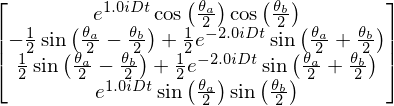

In [47]:
psiABt = Udd(D,t)*psiAB; simplify(factor(psiABt,cos(tha/2)))

### Mixed product states
\begin{equation}
\rho_{j}^{ab}(t)=U\rho_{j}^{ab}U^{\dagger}.
\end{equation}

#### Incoherent state

In [16]:
def rho3t(r3a,r3b,D,t):
    return Udd(D,t)*tp(rho1qb(0,0,r3a),rho1qb(0,0,r3b))*Dagger(Udd(D,t))

In [17]:
simplify(rho3t(a,b,D,t))

⎡0.25⋅(a + 1)⋅(b + 1)                                              0          
⎢                                                                             
⎢                             ⎛                2                              
⎢                             ⎜⎛     2.0⋅ⅈ⋅D⋅t⎞                               
⎢         0            0.0625⋅⎝⎝1 - ℯ         ⎠ ⋅(a - 1)⋅(b + 1) - (a + 1)⋅(b 
⎢                                                                             
⎢                                                                             
⎢                             ⎛           4.0⋅ⅈ⋅D⋅t                      4.0⋅ⅈ
⎢         0                   ⎝- 0.125⋅a⋅ℯ          + 0.125⋅a + 0.125⋅b⋅ℯ     
⎢                                                                             
⎣         0                                                        0          

                                                                              
                                                   

\begin{equation}
\rho_{3t} = \frac{1}{4}
\begin{bmatrix} 
(1+r_{3a})(1+r_{3b}) & 0 & 0 & 0 \\
0 & 1-r_{3a}r_{3b} + (r_{3a}-r_{3b})\cos2Dt & i(r_{3a}-r_{3b})\sin2Dt & 0 \\
0 & -i(r_{3a}-r_{3b})\sin2Dt & 1-r_{3a}r_{3b} - (r_{3a}-r_{3b})\cos2Dt & 0 \\
0 & 0 & 0 & (1-r_{3a})1-r_{3b}) 
\end{bmatrix}
\end{equation}

#### Coherent states

In [10]:
def rho1t(a,b,D,t):
    return Udd(D,t)*tp(rho1qb(a,0,0),rho1qb(b,0,0))*Dagger(Udd(D,t))

In [13]:
simplify(factor(rho1t(a,b,D,t)))

⎡                                                                             
⎢                                   0.25                                      
⎢                                                                             
⎢⎛           4.0⋅ⅈ⋅D⋅t                      4.0⋅ⅈ⋅D⋅t          ⎞  -3.0⋅ⅈ⋅D⋅t  
⎢⎝- 0.125⋅a⋅ℯ          + 0.125⋅a + 0.125⋅b⋅ℯ          + 0.125⋅b⎠⋅ℯ            
⎢                                                                             
⎢                ⎛   4.0⋅ⅈ⋅D⋅t          4.0⋅ⅈ⋅D⋅t    ⎞  -3.0⋅ⅈ⋅D⋅t            
⎢          0.125⋅⎝a⋅ℯ          + a - b⋅ℯ          + b⎠⋅ℯ                      
⎢                                                                             
⎢                                                                             
⎣                                 0.25⋅a⋅b                                    

      ⎛   4.0⋅ⅈ⋅D⋅t          4.0⋅ⅈ⋅D⋅t    ⎞  -1.0⋅ⅈ⋅D⋅t        ⎛   4.0⋅ⅈ⋅D⋅t  
0.125⋅⎝a⋅ℯ          - a + b⋅ℯ          + b⎠⋅ℯ      

\begin{equation}
\rho_{1}(t) = \begin{bmatrix} 1/4 & e^{iDt}\left(r_{1b}\cos(2Dt)+ir_{1a}\sin(2Dt)\right)/4 & 
\end{bmatrix}
\end{equation}

In [53]:
1/8

---
## Reduced evolved states

### Pure states
\begin{align}
\rho^{a}_{t} & = Tr_{b}|\Psi^{ab}_{t}\rangle\langle\Psi^{ab}_{t}| \\
&= 
\end{align}

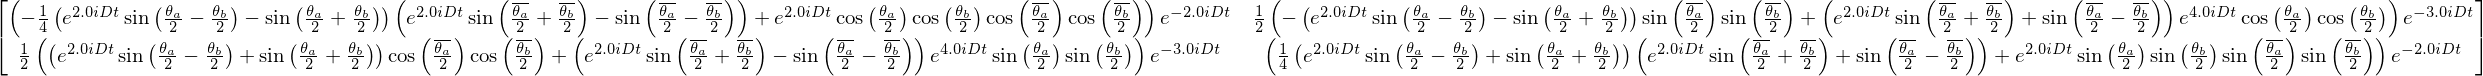

In [52]:
rhoAt = ptraceB(2, 2, proj(psiABt)); simplify(rhoAt)

### Incoherent mixed states

### Coherent mixed states

---
## Entanglement

In [ ]:
# try to compute the eigenvalues of the partial transpose
evals = zeros(2,1)
def ErhoN(a,b,D,t):
    SMt = Matrix([[(1+a)*(1+b),1j*(a-b)*sin(2*D*t)],[-1j*(a-b)*sin(2*D*t),(1-a)*(1-b)]])    
    evs = eVals(2,SMt)
    return 0.5*(abs(evs[0]) + abs(evs[1]) + abs(1-a*b+(a-b)*cos(2*D*t)) + abs(1-a*b-(a-b)*cos(2*D*t)) - 1)

In [ ]:
evals = zeros(4,1)
def Erho(a,b,D,t):
    rho3 = 0.25*Matrix([[(1+a)*(1+b),0,0,0],[0,1-a*b+(a-b)*cos(2*D*t),1j*(a-b)*sin(2*D*t),0],[0,-1j*(a-b)*sin(2*D*t),1-a*b-(a-b)*cos(2*D*t),0],[0,0,0,(1-a)*(1-b)]])
    #R = rho3*tp(Pauli(2),Pauli(2))*(rho3.T)*tp(Pauli(2),Pauli(2))
    #ev = eVals(4, R)
    #evm = max(abs(ev[0]), abs(ev[1]), abs(ev[2]), abs(ev[3]))
    #C = 2.0*sqrt(abs(evm)) - sqrt(abs(ev[0])) - sqrt(abs(ev[1])) - sqrt(abs(ev[2])) - sqrt(abs(ev[3]))
    #if C < 0.0:
    #    C = 0.0
    return concurrence(rho3)

In [ ]:
rhoTb = zeros(4,4); evals = zeros(4,1); simplify(negativity(2,2,rho3t(a,b,1,t)))

---
## Coherence
### Pure initial states

In [57]:
def Epsi(tha, thb, D, t):
    aa = np.cos(tha/2)
    ba = np.sin(tha/2)
    ab = np.cos(thb/2)
    bb = np.sin(thb/2)
    f = 2*aa*ba*ab*bb*(np.cos(2*D*t) - np.cos(4*D*t))
    g = (aa**2*bb**2 + ba**2*ab**2)*np.sin(2*D*t) + 2*aa*ba*ab*bb*np.sin(4*D*t)
    return np.sqrt(f**2 + g**2)

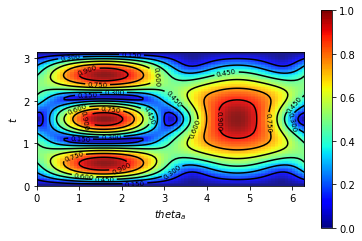

In [58]:
xll = 0
xul = 2*np.pi
yll = 0
yul = np.pi
x = np.linspace(xll, xul, 80)
y = np.linspace(yll, yul, 80)
X, Y = np.meshgrid(x, y)
Z = Epsi(X, np.pi/2, 1, Y)
contours = plt.contour(X, Y, Z, 6, colors='black')
plt.clabel(contours, inline=True, fontsize=7)
plt.imshow(Z, extent=[xll, xul, yll, yul], origin='lower', cmap=plt.cm.jet, alpha=0.9)
plt.colorbar()
plt.xlabel(r'$theta_{a}$')
plt.ylabel(r'$t$')
plt.clim(0, 1)
#plt.savefig('ERhor3b1.eps', format='eps', dpi=100)
plt.show()

#### Local coherence dynamics

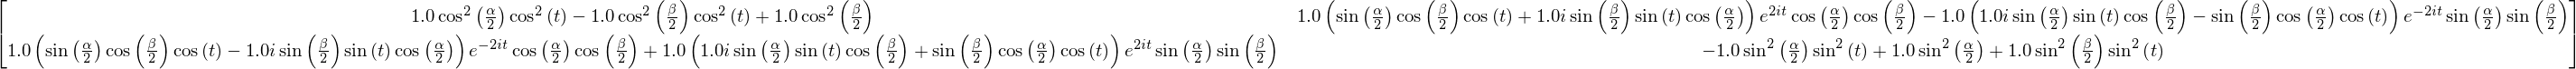

In [50]:
t, tta, ttb = symbols('t alpha beta', real = True)
Psi = zeros(4,1)
aa = cos(tta/2)
ba = sin(tta/2)
ab = cos(ttb/2)
bb = sin(ttb/2)
Psi = (aa*bb*cos(t)-1j*ba*ab*sin(t))*tp(cb(2,0),cb(2,1)) + (ba*ab*cos(t)-1j*aa*bb*sin(t))*tp(cb(2,1),cb(2,0)) + (cos(2*t)+1j*sin(2*t))*(aa*ab*tp(cb(2,0),cb(2,0))+ba*bb*tp(cb(2,1),cb(2,1)))
#Psi
Rho = zeros(4,4)
Rho = proj(Psi)
#Rho
rhoA = zeros(2,2)
RhoR = zeros(2,2)
RhoR = pTraceB(2,2,Rho)
simplify(RhoR)
#simplify(Cl1(rho1qb(r1,r2,r3),2))
#simplify(Cl1(RhoR,2))

In [24]:
import numpy as np
def Cl1Psi(tha, thb, D, t):
    aa = np.cos(tta/2)
    ba = np.sin(tta/2)
    ab = np.cos(ttb/2)
    bb = np.sin(ttb/2)
    x1 = aa**2*ba**2*(ab**4+bb**4)*(np.cos(D*t))**2
    x2 = ab**2*bb**2*(aa**4+ba**4)*(np.sin(D*t))**2
    x3 = 2*aa**2*ba**2*ab**2*bb**2*np.cos(2*D*t)*np.cos(4*D*t)
    x4 = - (aa*ba**3*ab**3*bb + aa**3*ba*ab*bb**3)*np.sin(2*D*t)*np.sin(4*D*t)
    return 2*sqrt(x1+x2+x3+x4)

In [26]:
xll = 0
xul = 2*np.pi
yll = 0
yul = np.pi
x = np.linspace(xll, xul, 80)
y = np.linspace(yll, yul, 80)
X, Y = np.meshgrid(x, y)
Z = Cl1Psi(X, 0*np.pi/8, 1, Y)
contours = plt.contour(X, Y, Z, 6, colors='black')
plt.clabel(contours, inline=True, fontsize=7)
plt.imshow(Z, extent=[xll, xul, yll, yul], origin='lower', cmap=plt.cm.jet, alpha=0.9)
plt.colorbar()
plt.xlabel(r'$theta_{a}$')
plt.ylabel(r'$t$')
plt.clim(0, 1)
#plt.savefig('ERhor3b1.eps', format='eps', dpi=100)
plt.show()

NameError: name 'tta' is not defined

In [18]:
import scipy.interpolate
N = 1000 #number of points for plotting/interpolation
#x, y, z = np.genfromtxt(r'/home/jonasmaziero/Dropbox/Research/qnesses/interplay/dipolar/dipolarCalc/Ct_tb2pi8.dat', unpack=True)
#x, y, z = np.genfromtxt(r'/home/jonasmaziero/Dropbox/Research/qnesses/interplay/dipolar/dipolarCalc/EpC_tb8pi8.dat', unpack=True)
xll = x.min();  xul = x.max();  yll = y.min();  yul = y.max()
xi = np.linspace(xll, xul, N)
yi = np.linspace(yll, yul, N)
zi = scipy.interpolate.griddata((x, y), z, (xi[None,:], yi[:,None]), method='linear', rescale=False)
contours = plt.contour(xi, yi, zi, 6, colors='black')
plt.clabel(contours, inline=True, fontsize=7)
plt.imshow(zi, extent=[xll, xul, yll, yul], origin='lower', cmap=plt.cm.jet, alpha=0.9)
plt.xlabel(r'$\theta_{a}$')
plt.ylabel(r'$t$')
plt.clim(0, 2)
plt.colorbar()
#plt.savefig('/home/jonasmaziero/Dropbox/Research/qnesses/interplay/dipolar/dipolarCalc/Ct_tb2pi8.eps', format='eps', dpi=100)
#plt.savefig('/home/jonasmaziero/Dropbox/Research/qnesses/interplay/dipolar/dipolarCalc/EpC_tb8pi8.eps', format='eps', dpi=100)
plt.show()

NameError: name 'x' is not defined

### Mixed initial states

In [ ]:
import scipy.interpolate
N = 1000 #number of points for plotting/interpolation
x, y, z = np.genfromtxt(r'/home/jonasmaziero/Dropbox/Research/qnesses/interplay/dipolar/dipolarCalc/ERho1tpi5.dat', unpack=True)
xll = x.min();  xul = x.max();  yll = y.min();  yul = y.max()
xi = np.linspace(xll, xul, N)
yi = np.linspace(yll, yul, N)
zi = scipy.interpolate.griddata((x, y), z, (xi[None,:], yi[:,None]), method='linear', rescale=False)
contours = plt.contour(xi, yi, zi, 6, colors='black')
plt.clabel(contours, inline=True, fontsize=7)
plt.imshow(zi, extent=[xll, xul, yll, yul], origin='lower', cmap=plt.cm.jet, alpha=0.9)
plt.xlabel(r'$r_{1a}$')
plt.ylabel(r'$r_{1b}$')
plt.clim(0, 1)
plt.colorbar()
#plt.savefig('/home/jonasmaziero/Dropbox/Research/qnesses/interplay/dipolar/dipolarCalc/ERho1tpi5.eps', format='eps', dpi=100)
plt.show()

### Partially entangled initial states

#### Pure initial states

In [ ]:
import scipy.interpolate
N = 1000 #number of points for plotting/interpolation
x, y, z = np.genfromtxt(r'/home/jonasmaziero/Dropbox/Research/qnesses/interplay/dipolar/dipolarCalc/EEpsi.dat', unpack=True)
xll = x.min();  xul = x.max();  yll = y.min();  yul = y.max()
xi = np.linspace(xll, xul, N)
yi = np.linspace(yll, yul, N)
zi = scipy.interpolate.griddata((x, y), z, (xi[None,:], yi[:,None]), method='linear', rescale=False)
contours = plt.contour(xi, yi, zi, 5, colors='black')
plt.clabel(contours, inline=True, fontsize=7)
plt.imshow(zi, extent=[xll, xul, yll, yul], origin='lower', cmap=plt.cm.jet, alpha=0.9)
plt.xlabel(r'$w$')
plt.ylabel(r'$t$')
plt.clim(0, 1)
plt.colorbar()
#plt.savefig('/home/jonasmaziero/Dropbox/Research/qnesses/interplay/dipolar/dipolarCalc/EEpsi.eps', format='eps', dpi=100)
plt.show()

#### Mixed initial states

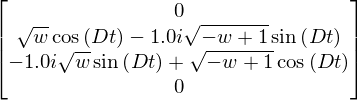

In [55]:
D, t = symbols('D t', real = True)
w = symbols('w', real = True, range = (0,1))
psit = (sqrt(w)*cos(D*t)-1j*sqrt(1-w)*sin(D*t))*tp(cb(2,0),cb(2,1)) + (sqrt(1-w)*cos(D*t)-1j*sqrt(w)*sin(D*t))*tp(cb(2,1),cb(2,0))
#rhot = (1-p)*eye(4)/4 + p*proj(psit)
psit

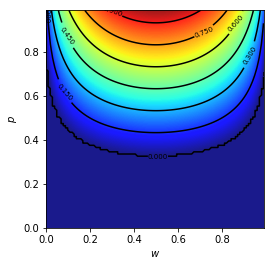

In [76]:
import scipy.interpolate
N = 1000 #number of points for plotting/interpolation
x, y, z = np.genfromtxt(r'/home/jonasmaziero/Dropbox/Research/qnesses/interplay/dipolar/dipolarCalc/EErhotpi2.dat', unpack=True)
xll = x.min();  xul = x.max();  yll = y.min();  yul = y.max()
xi = np.linspace(xll, xul, N)
yi = np.linspace(yll, yul, N)
zi = scipy.interpolate.griddata((x, y), z, (xi[None,:], yi[:,None]), method='linear', rescale=False)
contours = plt.contour(xi, yi, zi, 6, colors='black')
plt.clabel(contours, inline=True, fontsize=7)
plt.imshow(zi, extent=[xll, xul, yll, yul], origin='lower', cmap=plt.cm.jet, alpha=0.9)
plt.xlabel(r'$w$')
plt.ylabel(r'$p$')
plt.clim(0, 1)
#plt.colorbar()
#plt.savefig('/home/jonasmaziero/Dropbox/Research/qnesses/interplay/dipolar/dipolarCalc/EErhotpi2.eps', format='eps', dpi=100)
plt.show()